In [56]:
#Régression Linéaire avec Python
import numpy as np
from sklearn.linear_model import LinearRegression

In [2]:
#Variable explicative x
x=np.arange(7,58,10)
x

array([ 7, 17, 27, 37, 47, 57])

In [3]:
#Variable expliquée y
y=np.array([7,18,16,24,22,30])

In [4]:
x=x.reshape((-1,1))
x

array([[ 7],
       [17],
       [27],
       [37],
       [47],
       [57]])

In [5]:
y

array([ 7, 18, 16, 24, 22, 30])

In [6]:
import matplotlib
import matplotlib.pyplot as plt

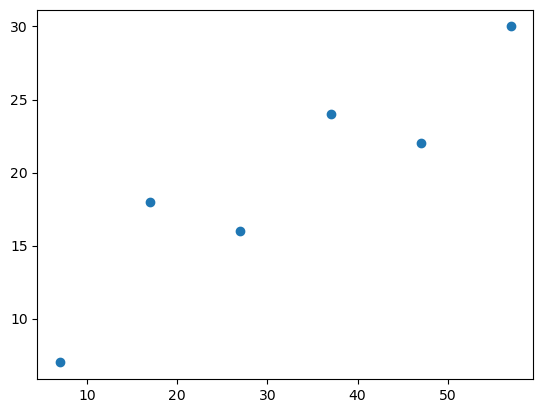

In [7]:
plt.scatter(x,y)
plt.show()

In [8]:
#Creation du modèle de regréssion
model=LinearRegression()

In [9]:
model

LinearRegression()

In [11]:
#Estimation du modèle par la fonction fit()
model.fit(x,y)

LinearRegression()

In [12]:
#Affichage de R square
coef_det=model.score(x,y)
print('coefficient de détermination:',coef_det)

coefficient de détermination: 0.8466898954703834


In [13]:
#Affichage des paramètres du modèle
print('Ordonnée à l\'origine:',model.intercept_)
print('pente:', model.coef_)

Ordonnée à l'origine: 7.157142857142858
pente: [0.38571429]


In [17]:
#Prédiction en utilisant l'intercept et la pente
y_pred=model.intercept_+model.coef_*x
print('prédictions:', y_pred,sep='\n')
y

prédictions:
[[ 9.85714286]
 [13.71428571]
 [17.57142857]
 [21.42857143]
 [25.28571429]
 [29.14285714]]


array([ 7, 18, 16, 24, 22, 30])

In [15]:
#Prédiction en utilisant la fonction predict
y_pred=model.predict(x)
print('prédiction:',y_pred,sep='\n')

prédiction:
[ 9.85714286 13.71428571 17.57142857 21.42857143 25.28571429 29.14285714]


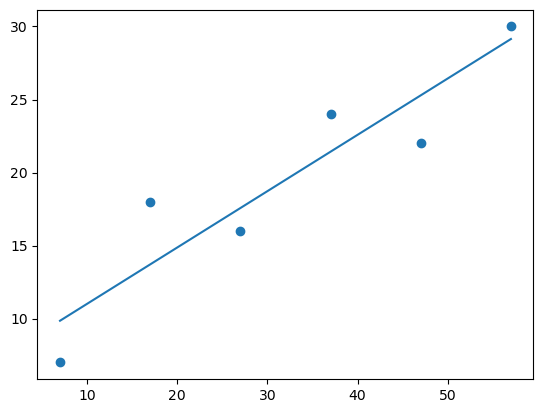

In [20]:
#visualisation des ecart entre la prévision et les valeurs réelles
plt.scatter(x,y)
plt.plot(x,y_pred)
plt.show()

In [21]:
#Support Vector Machines(SVM)
from sklearn import datasets
cancer=datasets.load_breast_cancer()

In [22]:
cancer.data.shape

(569, 30)

In [23]:
#Affichage des attribus et des etiquettes
print("Attribus:", cancer.feature_names)
print("Etiquettes:", cancer.target_names)

Attribus: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Etiquettes: ['malignant' 'benign']


In [24]:
print(cancer.data[0:5])

[[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
  7.017e-02 1.812e-01 5.667e-02 5.435e-01 7.339e-01 3.398e+00 7.408e+01
  5.225e-03 1.308e-02 1.860e-02 1.340e-02 1.389e-02 3.532e-03 2.499e+01
  2.341e+01 1.588e+02 1.956e+03 1.238e-01 1.866e-01 2.416e-01 1.860e-01
  2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 1.203e+03 1.096e-01 1.599e-01 1.974e-01
  1.279e-01 2.069e-01 5.999e-02 7.456e-01 7.869e-01 4.585e+00 9.403e+01
  6.150e-03 4.006e-02 3.832e-02 2.058e-02 2.250e-02 4.571e-03 2.357e+01
  2.553e+01 1.525e+02 1.709e+03 1.444e-01 4.245e-01 4.504e-01 2.430e-01
  3.613e-01 8.758e-02]
 [1.142e+01 2.038e+01 7.758e+01 3.861e+02 1.425e-01 2.839e-01 2.414

In [26]:
print(cancer.target[0:5])

[0 0 0 0 0]


In [27]:
print(cancer.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

In [28]:
#Répartision des données en une partie consacrée à l'apprentissage et une partie consacrée au test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(cancer.data,cancer.target,test_size=0.3,random_state=109)

In [30]:
#Usage d'un objet classifieur 
from sklearn import svm
clf=svm.SVC(kernel="linear")

In [32]:
#Model
clf.fit(x_train,y_train)

SVC(kernel='linear')

In [33]:
#Prédiction
y_pred=clf.predict(x_test)

In [34]:
#Evaluation de qualité du modèle
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.9649122807017544


In [37]:
#Classifieurs naïfs de Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib
import matplotlib.pyplot as plt 

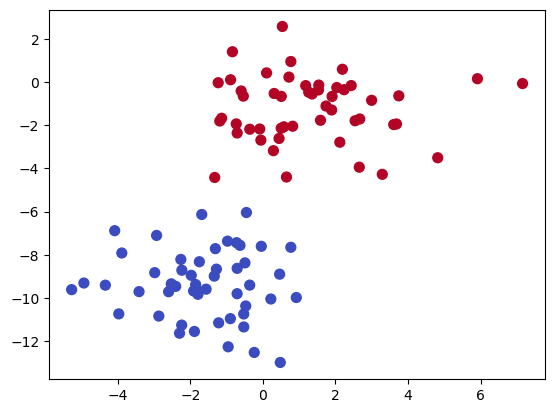

In [38]:
x,y=make_blobs(100,2,centers=2,random_state=2,cluster_std=1.5)
plt.scatter(x[:,0],x[:,1],c=y,s=50,cmap='coolwarm')
plt.show()

In [39]:
#Le Modèle
model=GaussianNB()
model.fit(x,y)

GaussianNB()

In [41]:
rng=np.random.RandomState(0)
Xnouv=[-4,-16]+[12,20]*rng.rand(3000,2)
ynouv=model.predict(Xnouv)

(-5.890554373486014,
 7.777566725032841,
 -13.775943665162341,
 3.3634536696825847)

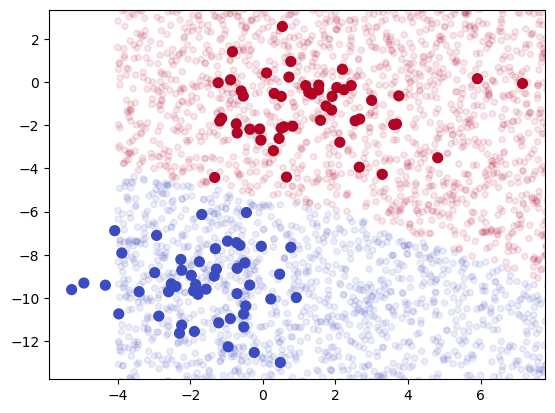

In [44]:
plt.scatter(x[:,0],x[:,1],c=y,s=50,cmap='coolwarm')
lim=plt.axis()
plt.scatter(Xnouv[:,0],Xnouv[:,1],c=ynouv,s=20,cmap='coolwarm',alpha=0.1)
plt.axis(lim)


In [45]:
#Exemple
import pandas as pd
Iris=pd.read_pickle('iris.pkl')

In [46]:
Iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [49]:
#Répartition des données
from sklearn.model_selection import train_test_split
X=Iris.iloc[:,:-1]
y=Iris.iloc[:,4]
x_a,x_test,y_a,y_test=train_test_split(X,y,test_size=0.10)

In [50]:
model.fit(x_a,y_a)
prediction=model.predict(x_test)

In [51]:
#Evaluation des résultats
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

In [54]:
print(metrics.classification_report(y_test,prediction))
print(metrics.confusion_matrix(y_test,prediction))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         4
  versicolor       0.57      0.80      0.67         5
   virginica       0.75      0.50      0.60         6

    accuracy                           0.73        15
   macro avg       0.77      0.77      0.76        15
weighted avg       0.76      0.73      0.73        15

[[4 0 0]
 [0 4 1]
 [0 3 3]]


In [57]:
#L'algorithme de K-means
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs

In [59]:
#Génénration de jeu de données bidimensionnel contenant quatre groupes
x,y_reel=make_blobs(n_samples=300,centers=4,cluster_std=0.50,random_state=0)
df=pd.concat([pd.DataFrame(x),pd.DataFrame(y_reel)],axis=1)

In [60]:
df.head

<bound method NDFrame.head of             0         1  0
0    1.039925  1.929910  1
1   -1.386091  7.480596  3
2    1.125389  4.966980  0
3   -1.056890  7.818339  3
4    1.402004  1.726729  1
..        ...       ... ..
295  1.987293  1.466109  1
296  2.441163  1.309416  1
297  0.528537  4.497239  0
298  0.099856  7.798498  3
299 -1.747365  2.777705  2

[300 rows x 3 columns]>

In [61]:
#chargement de l'algorithme K-means
from sklearn.cluster import KMeans

In [63]:
kmeans=KMeans(n_clusters=4)
kmeans.fit(x)
y_pred=kmeans.predict(x)

C:\Users\chaou\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\chaou\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


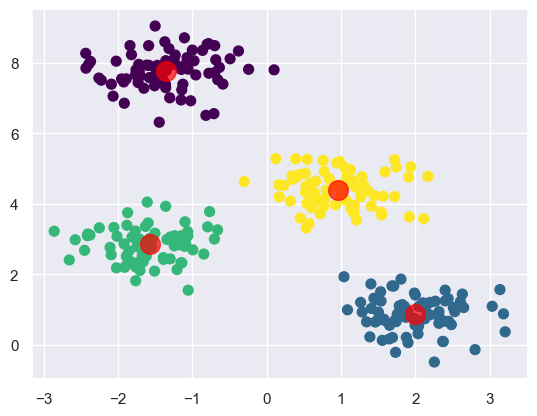

In [66]:
plt.scatter(x[:,0],x[:,1],c=y_pred,s=50,cmap='viridis')
centers=kmeans.cluster_centers_
plt.scatter(centers[:,0],centers[:,1],c='red',s=200,alpha=0.7)

In [68]:
#Evaluation 
from sklearn.metrics import confusion_matrix
confusion_matrix(y_reel,y_pred)

array([[ 0,  0,  0, 75],
       [ 0, 75,  0,  0],
       [ 0,  0, 75,  0],
       [75,  0,  0,  0]], dtype=int64)

C:\Users\chaou\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\chaou\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


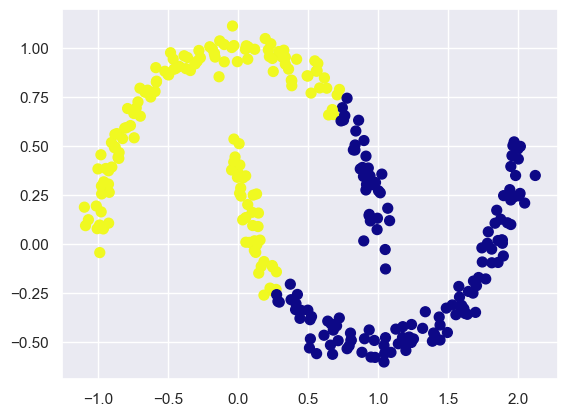

In [69]:
#Inconvenients de KMeans
from sklearn.datasets import make_moons
x,y=make_moons(300,noise=0.05,random_state=0)
labels=KMeans(2,random_state=0).fit_predict(x)
plt.scatter(x[:,0],x[:,1],c=labels,s=50,cmap='plasma');